<a href="https://colab.research.google.com/github/Purity-E/NobukAfrica/blob/main/nobuk_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing file module
from google.colab import files

In [ ]:
# uploading files
uploaded = files.upload()

Saving events-export-2795217-1678446726055.csv to events-export-2795217-1678446726055.csv


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss

In [ ]:
import warnings

warnings.filterwarnings('ignore')

**Exploring dataset and Data Cleaning**

In [ ]:
# creating dataframe
df = pd.read_csv('events-export-2795217-1678446726055.csv')
# shape
print(df.shape)
# reading first 5 rows
df.head()

(100, 41)


,Event Name,Time,Distinct ID,App Build Number,App Release,App Version,App Version.1,Bluetooth Version,Brand,Carrier,...,Previous Page,User Id,Country,mixpanel library,time processed (UTC),Session Length,Transaction,View,Version Updated,message
0,SCREEN_VIEW,1.678434e+09,112fba7d-437d-4248-8da7-fcdc937b0867,36,36,1.7.1,1.7.1,ble,generic,Android Virtual Operator,...,/,NaN,US,flutter,1678434221643,NaN,NaN,NaN,NaN,NaN
1,SCREEN_VIEW,1.678434e+09,112fba7d-437d-4248-8da7-fcdc937b0867,36,36,1.7.1,1.7.1,ble,generic,Android Virtual Operator,...,NaN,NaN,US,flutter,1678434219290,NaN,NaN,NaN,NaN,NaN
2,First App Open,1.678434e+09,112fba7d-437d-4248-8da7-fcdc937b0867,36,36,1.7.1,1.7.1,ble,generic,Android Virtual Operator,...,NaN,NaN,US,flutter,1678434219003,NaN,NaN,NaN,NaN,NaN
3,App Session,1.678429e+09,801e40da-a37f-42fb-82da-a1914378f185,1036,1036,1.7.1,1.7.1,ble,samsung,SAF FOR YOU,...,NaN,182f6ff0-3ce2-435f-a9a1-5ceb248738d2,KE,flutter,1678428503655,20.4,NaN,NaN,NaN,NaN
4,App Session,1.678428e+09,801e40da-a37f-42fb-82da-a1914378f185,1036,1036,1.7.1,1.7.1,ble,samsung,SAF FOR YOU,...,NaN,182f6ff0-3ce2-435f-a9a1-5ceb248738d2,KE,flutter,1678428461584,91.6,NaN,NaN,NaN,NaN


In [ ]:
# getting column names
df.columns

Index(['Event Name', 'Time', 'Distinct ID', 'App Build Number', 'App Release',
       'App Version', 'App Version.1', 'Bluetooth Version', 'Brand', 'Carrier',
       'City', 'Device ID', 'Had Persisted Distinct Id', 'Has NFC',
       'Has Telephone', 'Insert ID', 'Library Version', 'Manufacturer',
       'Model', 'API Endpoint', 'API Timestamp', 'Operating System',
       'OS Version', 'Region', 'Screen DPI', 'Screen Height', 'Screen Width',
       'Wifi', 'Name', 'Org Id', 'Page', 'Previous Page', 'User Id', 'Country',
       'mixpanel library', 'time processed (UTC)', 'Session Length',
       'Transaction', 'View', 'Version Updated', 'message'],
      dtype='object')

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# checking for missing values
df.isna().sum()

Event Name                    0
Time                          0
Distinct ID                   0
App Build Number              0
App Release                   0
App Version                   0
App Version.1                 0
Bluetooth Version             0
Brand                         0
Carrier                       0
City                          0
Device ID                     0
Had Persisted Distinct Id     0
Has NFC                       0
Has Telephone                 0
Insert ID                     0
Library Version               0
Manufacturer                  0
Model                         0
API Endpoint                  0
API Timestamp                 0
Operating System              0
OS Version                    0
Region                        0
Screen DPI                    0
Screen Height                 0
Screen Width                  0
Wifi                          0
Name                         12
Org Id                       12
Page                         40
Previous

In [ ]:
# dropping the columns with several missing values
df = df.drop(['Session Length', 'Transaction', 'View', 'Version Updated', 'message'], axis=1)
df.head()

,Event Name,Time,Distinct ID,App Build Number,App Release,App Version,App Version.1,Bluetooth Version,Brand,Carrier,...,Screen Width,Wifi,Name,Org Id,Page,Previous Page,User Id,Country,mixpanel library,time processed (UTC)
0,SCREEN_VIEW,1.678434e+09,112fba7d-437d-4248-8da7-fcdc937b0867,36,36,1.7.1,1.7.1,ble,generic,Android Virtual Operator,...,1080,False,NaN,NaN,/onboarding,/,NaN,US,flutter,1678434221643
1,SCREEN_VIEW,1.678434e+09,112fba7d-437d-4248-8da7-fcdc937b0867,36,36,1.7.1,1.7.1,ble,generic,Android Virtual Operator,...,1080,False,NaN,NaN,/,NaN,NaN,US,flutter,1678434219290
2,First App Open,1.678434e+09,112fba7d-437d-4248-8da7-fcdc937b0867,36,36,1.7.1,1.7.1,ble,generic,Android Virtual Operator,...,1080,False,NaN,NaN,NaN,NaN,NaN,US,flutter,1678434219003
3,App Session,1.678429e+09,801e40da-a37f-42fb-82da-a1914378f185,1036,1036,1.7.1,1.7.1,ble,samsung,SAF FOR YOU,...,1080,True,Elvis Bando,5e19be0a-6c55-4d01-9083-76541da76ca1,NaN,NaN,182f6ff0-3ce2-435f-a9a1-5ceb248738d2,KE,flutter,1678428503655
4,App Session,1.678428e+09,801e40da-a37f-42fb-82da-a1914378f185,1036,1036,1.7.1,1.7.1,ble,samsung,SAF FOR YOU,...,1080,True,Elvis Bando,5e19be0a-6c55-4d01-9083-76541da76ca1,NaN,NaN,182f6ff0-3ce2-435f-a9a1-5ceb248738d2,KE,flutter,1678428461584


In [ ]:
# getting info on the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Event Name                 100 non-null    object 
 1   Time                       100 non-null    float64
 2   Distinct ID                100 non-null    object 
 3   App Build Number           100 non-null    int64  
 4   App Release                100 non-null    int64  
 5   App Version                100 non-null    object 
 6   App Version.1              100 non-null    object 
 7   Bluetooth Version          100 non-null    object 
 8   Brand                      100 non-null    object 
 9   Carrier                    100 non-null    object 
 10  City                       100 non-null    object 
 11  Device ID                  100 non-null    object 
 12  Had Persisted Distinct Id  100 non-null    bool   
 13  Has NFC                    100 non-null    bool   


**EDA**

In [ ]:
# creating a list of numerical columns
num_cols = ['Screen DPI', 'Screen Height', 'Screen Width', 'time processed (UTC)', 'Time', 'API Timestamp']

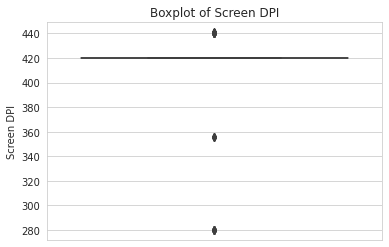

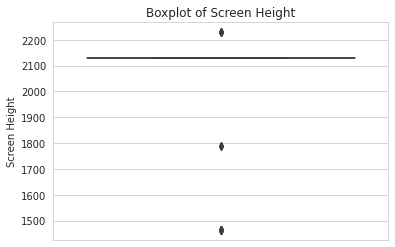

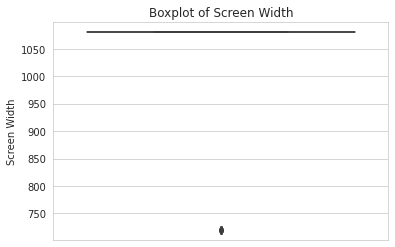

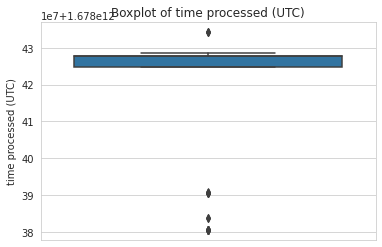

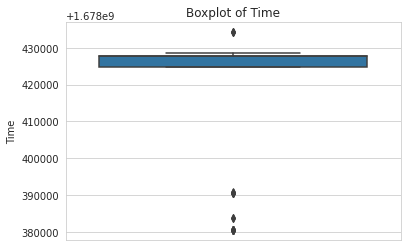

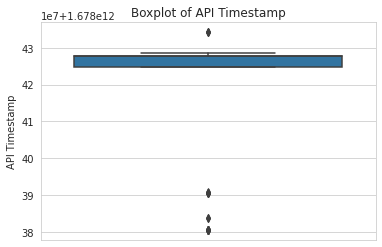

In [ ]:
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, num_cols)

Boxplot is not showing so much insight. I think it's due to the small size of dataset. 
We'll try distribution and a histogram plot.

In [ ]:
# creating distribution and histogram plot of numerical features
def plotGraph (dataset, feature):
    #plt.style.use('solarize_Light2')
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.title(f'{feature} Distribution Graph')
    sns.distplot(dataset[feature], color='blue')
    
    plt.subplot(1,2,2)
    plt.title(f'{feature} Histogram Graph')
    sns.histplot(dataset[feature], color='blue', kde=True, bins=10)
    
    plt.show()

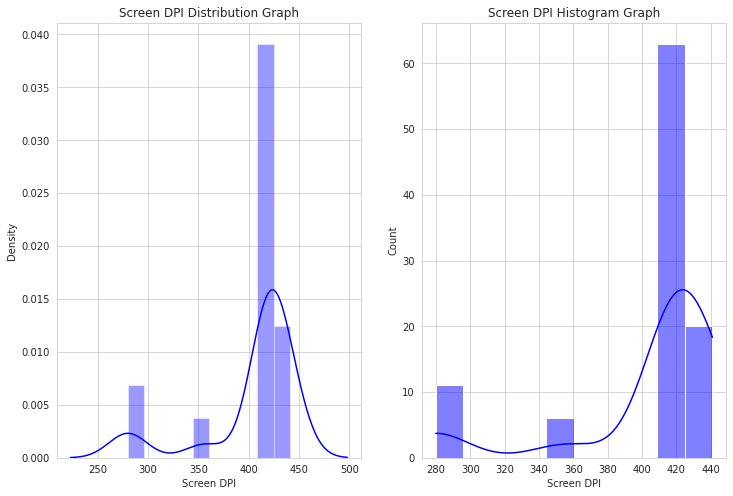

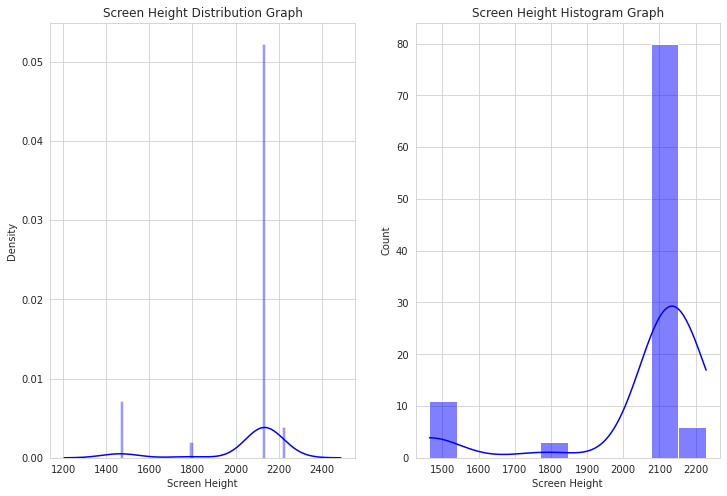

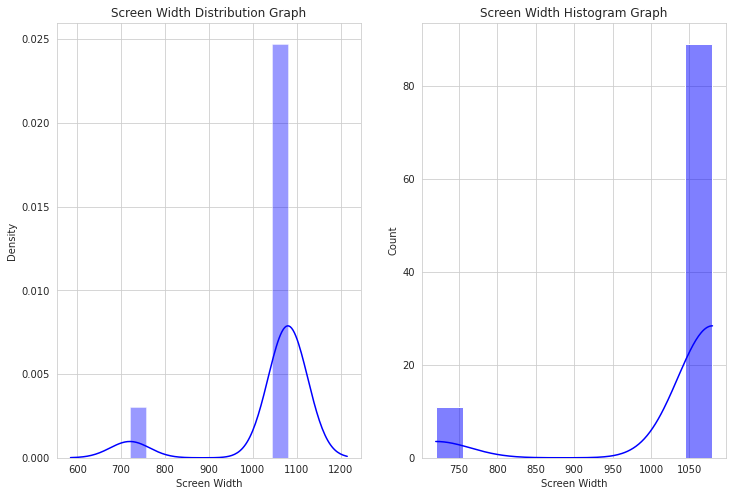

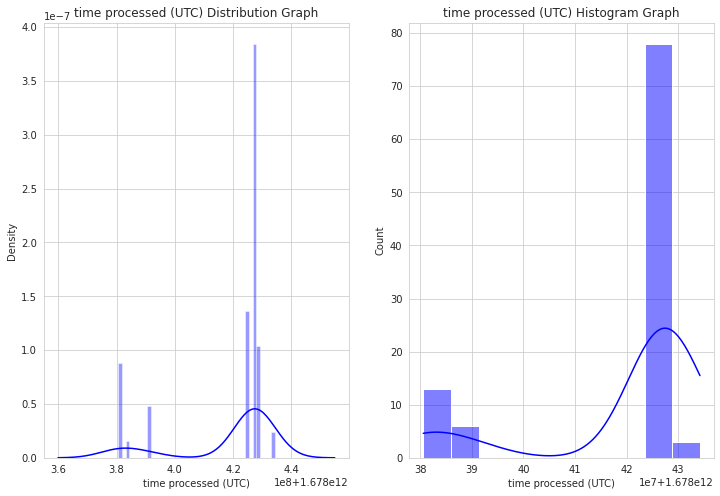

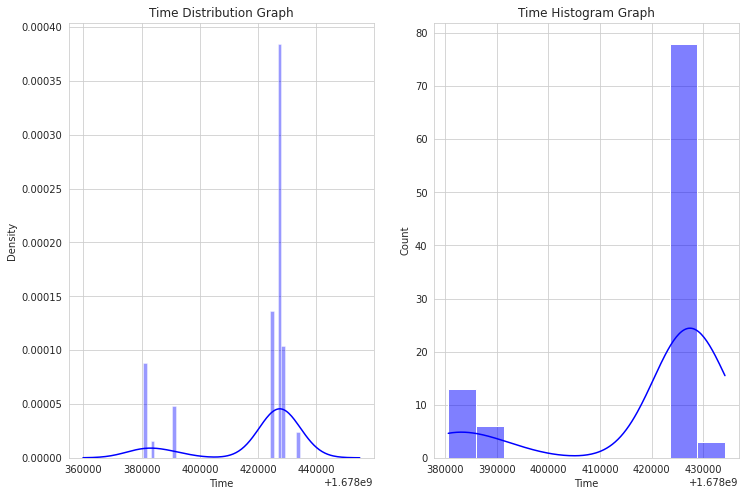

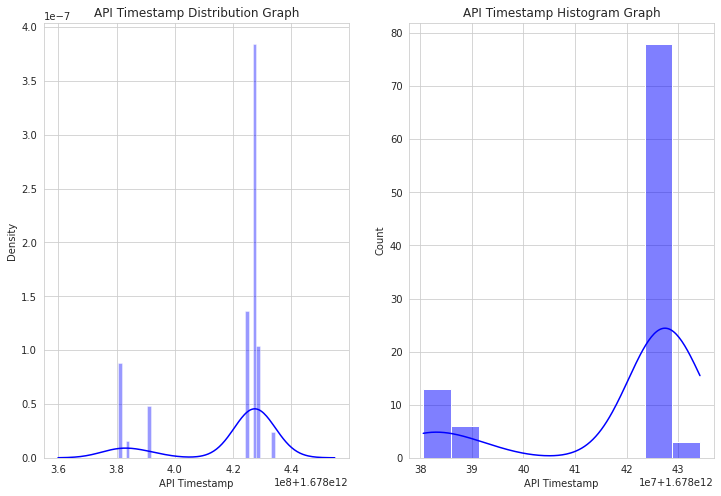

In [ ]:
for col in num_cols:
    plotGraph(df, col)

In [ ]:
# getting numerical summary of the nummerical columns
df[num_cols].describe()

,Screen DPI,Screen Height,Screen Width,time processed (UTC),Time,API Timestamp
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,404.790000,2053.050000,1040.400000,1.678419e+12,1.678419e+09,1.678419e+12
std,47.690563,217.811585,113.207774,1.730335e+07,1.730424e+04,1.730398e+07
min,280.000000,1464.000000,720.000000,1.678381e+12,1.678381e+09,1.678381e+12
25%,420.000000,2130.000000,1080.000000,1.678425e+12,1.678425e+09,1.678425e+12
50%,420.000000,2131.000000,1080.000000,1.678428e+12,1.678428e+09,1.678428e+12
75%,420.000000,2131.000000,1080.000000,1.678428e+12,1.678428e+09,1.678428e+12
max,441.000000,2229.000000,1080.000000,1.678434e+12,1.678434e+09,1.678434e+12


In [ ]:
# skew values of the numerical variables in the data set
df[num_cols].skew()

Screen DPI             -1.992400
Screen Height          -2.228194
Screen Width           -2.531015
time processed (UTC)   -1.617901
Time                   -1.617927
API Timestamp          -1.617910
dtype: float64

In [ ]:
# kurtosis values of the numerical variables in the data set
df[num_cols].kurtosis()

Screen DPI              2.583743
Screen Height           3.333743
Screen Width            4.495564
time processed (UTC)    0.773278
Time                    0.773516
API Timestamp           0.773435
dtype: float64

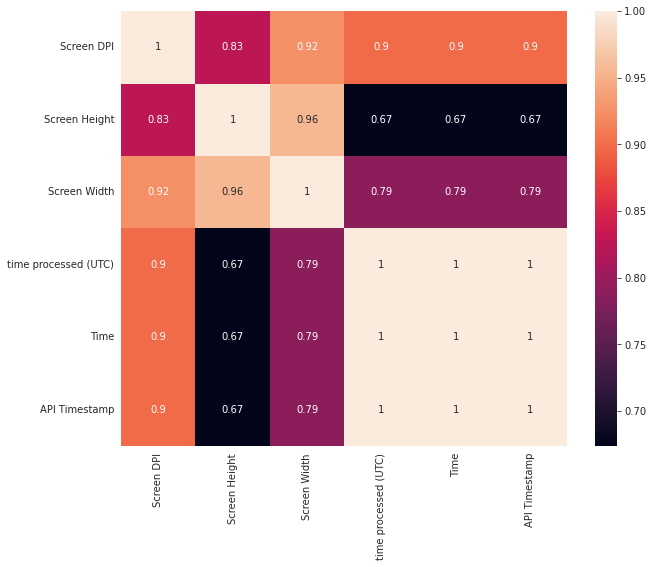

In [ ]:
# finding correlation of numerical columns
corr_Matrix = df[num_cols].corr()
# creating a heatmap to check for correlation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_Matrix,annot=True, ax=ax)
plt.show()

In [ ]:
# converting bool and some int columns to object type
for col in ['App Build Number', 'App Release', 'OS Version', 'Had Persisted Distinct Id', 'Has NFC', 'Has Telephone', 'Wifi']:
  df[col] = df[col].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Event Name                 100 non-null    object 
 1   Time                       100 non-null    float64
 2   Distinct ID                100 non-null    object 
 3   App Build Number           100 non-null    object 
 4   App Release                100 non-null    object 
 5   App Version                100 non-null    object 
 6   App Version.1              100 non-null    object 
 7   Bluetooth Version          100 non-null    object 
 8   Brand                      100 non-null    object 
 9   Carrier                    100 non-null    object 
 10  City                       100 non-null    object 
 11  Device ID                  100 non-null    object 
 12  Had Persisted Distinct Id  100 non-null    object 
 13  Has NFC                    100 non-null    object 


In [ ]:
# creating a list of categorical values
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
cat_cols

['Event Name',
 'Distinct ID',
 'App Build Number',
 'App Release',
 'App Version',
 'App Version.1',
 'Bluetooth Version',
 'Brand',
 'Carrier',
 'City',
 'Device ID',
 'Had Persisted Distinct Id',
 'Has NFC',
 'Has Telephone',
 'Insert ID',
 'Library Version',
 'Manufacturer',
 'Model',
 'API Endpoint',
 'Operating System',
 'OS Version',
 'Region',
 'Wifi',
 'Name',
 'Org Id',
 'Page',
 'Previous Page',
 'User Id',
 'Country',
 'mixpanel library']

In [ ]:
# removing the ID columns from the list
for item in ['Distinct ID', 'Device ID', 'Insert ID', 'Org Id', 'User Id']:
  cat_cols.remove(item)
cat_cols

['Event Name',
 'App Build Number',
 'App Release',
 'App Version',
 'App Version.1',
 'Bluetooth Version',
 'Brand',
 'Carrier',
 'City',
 'Had Persisted Distinct Id',
 'Has NFC',
 'Has Telephone',
 'Library Version',
 'Manufacturer',
 'Model',
 'API Endpoint',
 'Operating System',
 'OS Version',
 'Region',
 'Wifi',
 'Name',
 'Page',
 'Previous Page',
 'Country',
 'mixpanel library']

In [ ]:
# getting value counts for categorical columns
for col in cat_cols:
  print(df[col].value_counts())

SCREEN_VIEW            78
App Session             7
LOGIN                   5
First App Open          2
TAP_CASHBOOK_FILTER     2
NEW_TAG                 1
NEW_SALE                1
TAP_ADD_DEBT            1
ACCEPT_NOBUK_POLICY     1
App Updated             1
LOGIN_FAIL              1
Name: Event Name, dtype: int64
1036    61
36      39
Name: App Build Number, dtype: int64
1036    61
36      39
Name: App Release, dtype: int64
1.7.1    100
Name: App Version, dtype: int64
1.7.1    100
Name: App Version.1, dtype: int64
ble    100
Name: Bluetooth Version, dtype: int64
samsung    63
xiaomi     17
Nokia      11
google      6
generic     3
Name: Brand, dtype: int64
SAF FOR YOU                 74
Safaricom                   17
Faiba                        6
Android Virtual Operator     3
Name: Carrier, dtype: int64
Nairobi        97
Los Angeles     3
Name: City, dtype: int64
False    100
Name: Had Persisted Distinct Id, dtype: int64
False    83
True     17
Name: Has NFC, dtype: int64
True    1

In [ ]:
#bar graph for value counts for categorical columns
def plot_catcols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (10,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()

Event Name


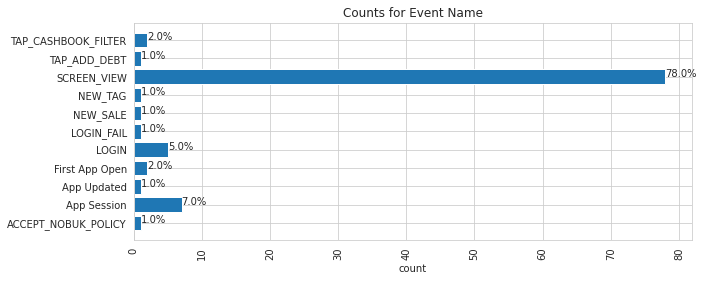

App Build Number


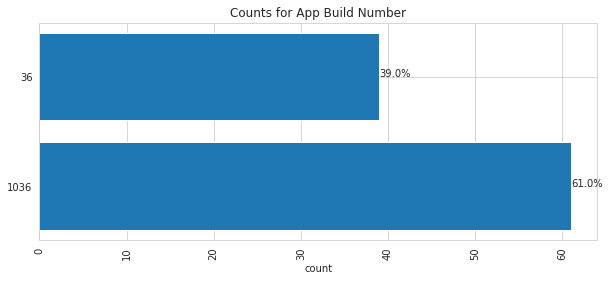

App Release


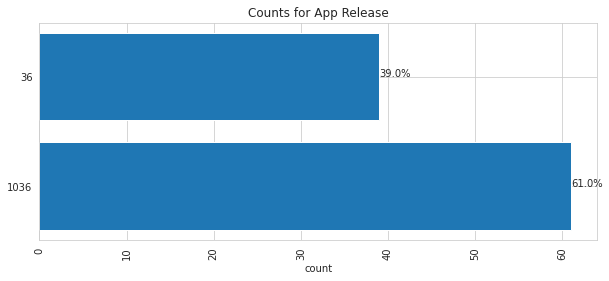

App Version


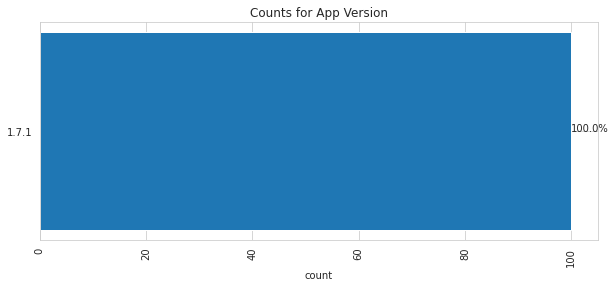

App Version.1


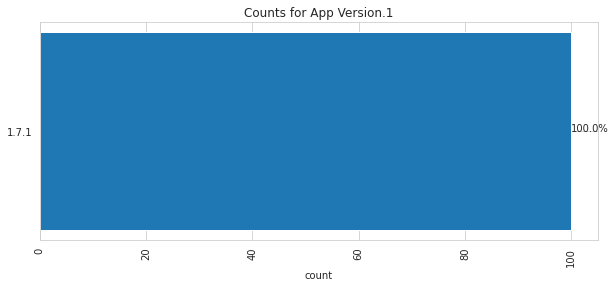

Bluetooth Version


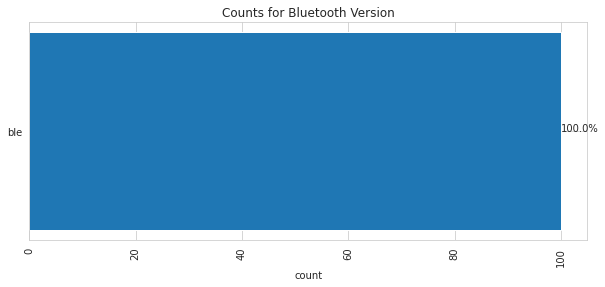

Brand


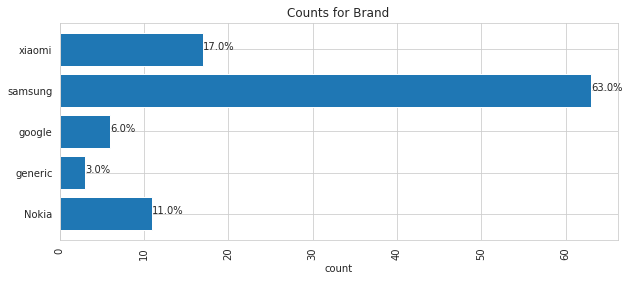

Carrier


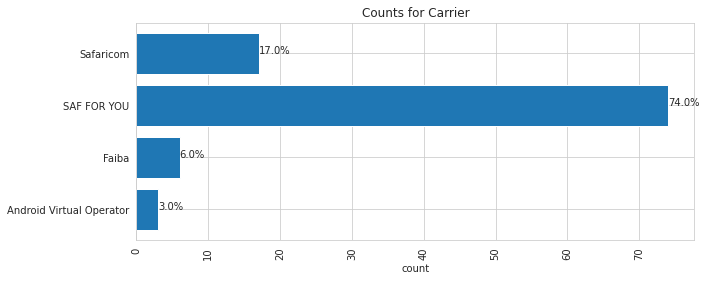

City


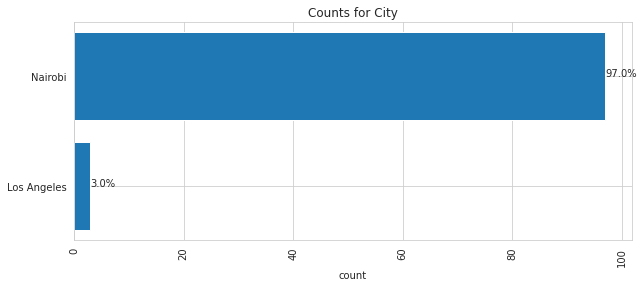

Had Persisted Distinct Id


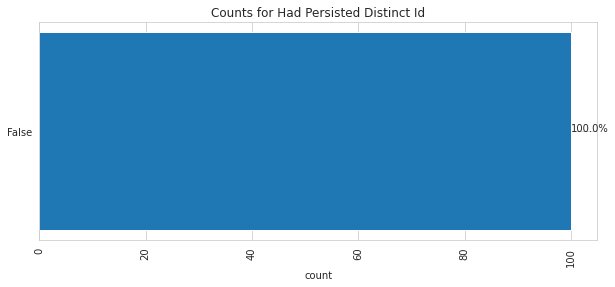

Has NFC


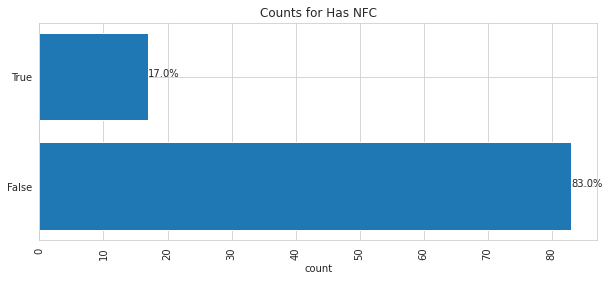

Has Telephone


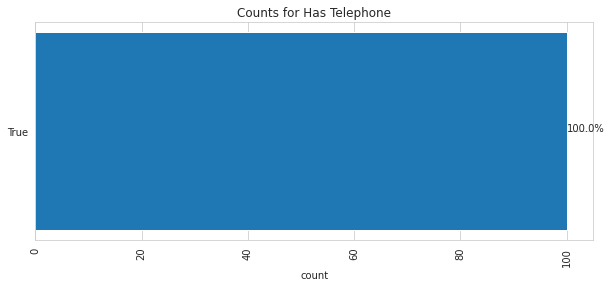

Library Version


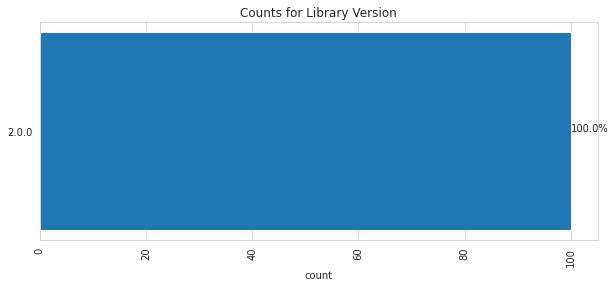

Manufacturer


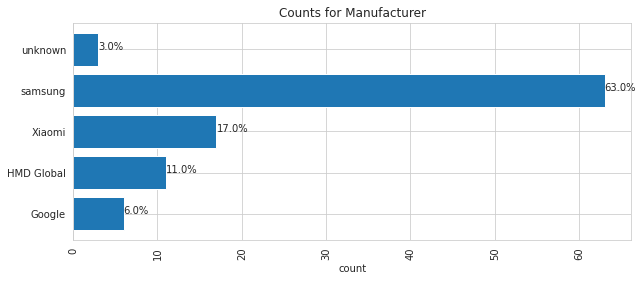

Model


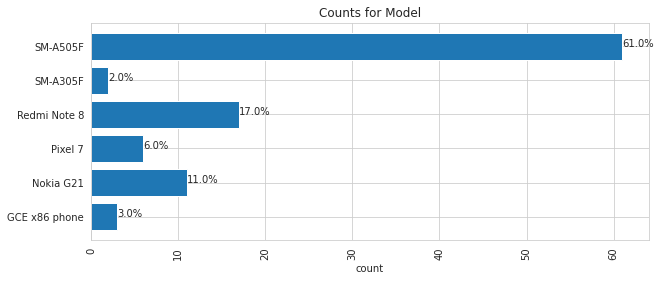

API Endpoint


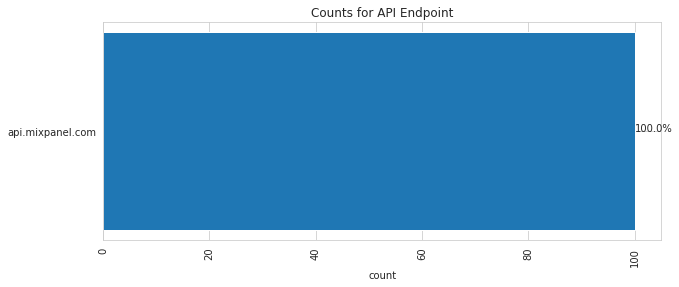

Operating System


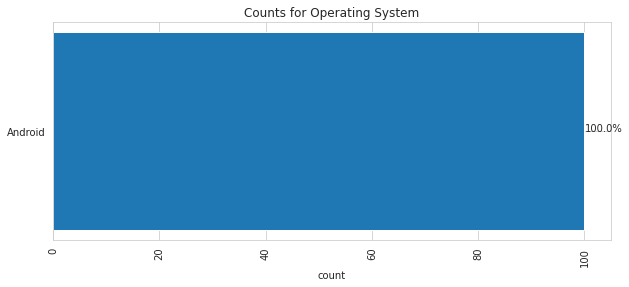

OS Version


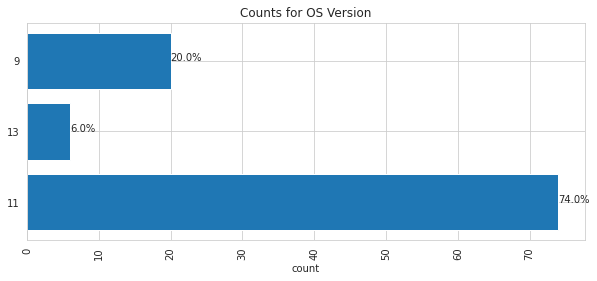

Region


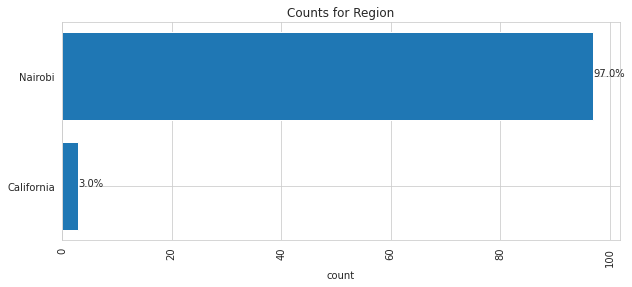

Wifi


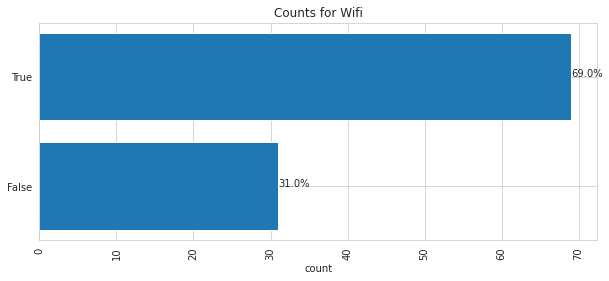

Name


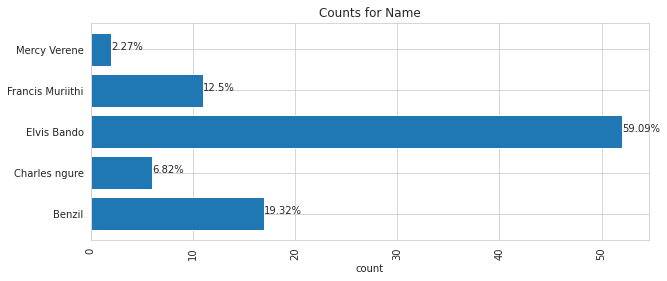

Page


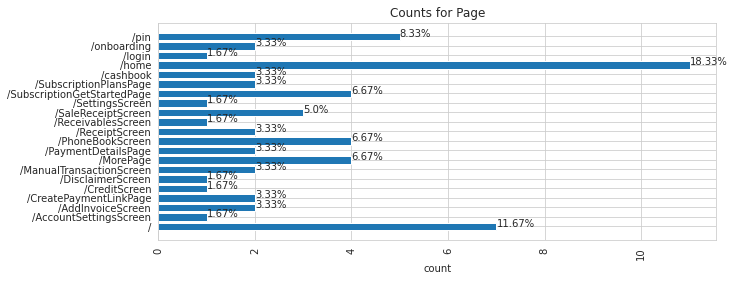

Previous Page


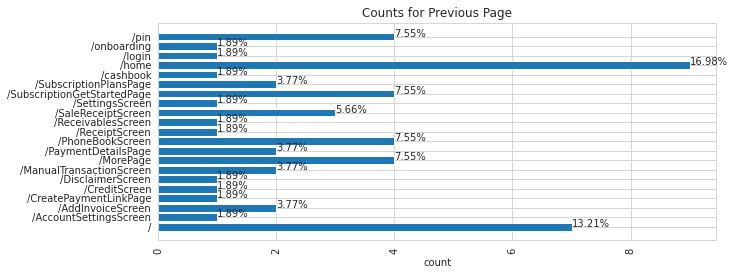

Country


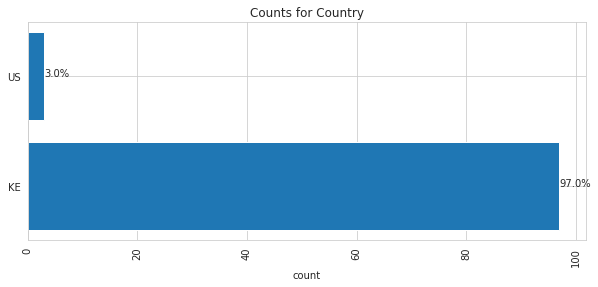

mixpanel library


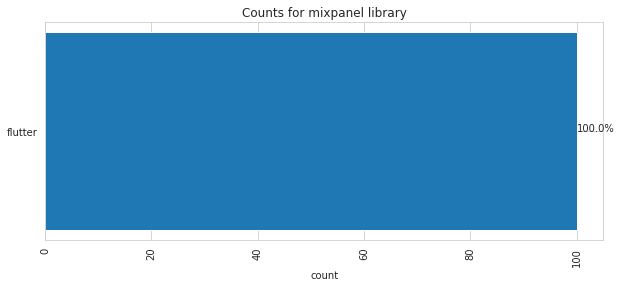

In [ ]:
plot_catcols(cat_cols, df)

**Relationship between categorical and numerical variables**

In [ ]:
# dropping the categorical columns with just one value count
for item in ['App Version', 'App Version.1', 'Bluetooth Version', 'Had Persisted Distinct Id', 'Has Telephone', 'Library Version',
             'API Endpoint', 'Operating System', 'mixpanel library']:
             cat_cols.remove(item)
cat_cols

['Event Name',
 'App Build Number',
 'App Release',
 'Brand',
 'Carrier',
 'City',
 'Has NFC',
 'Manufacturer',
 'Model',
 'OS Version',
 'Region',
 'Wifi',
 'Name',
 'Page',
 'Previous Page',
 'Country']

**Finding relationship between categorical variables**

In [ ]:
# creating a dataframe with all categorical variables
df_cat = df[cat_cols]
df_cat.head()

,Event Name,App Build Number,App Release,Brand,Carrier,City,Has NFC,Manufacturer,Model,OS Version,Region,Wifi,Name,Page,Previous Page,Country
0,SCREEN_VIEW,36,36,generic,Android Virtual Operator,Los Angeles,False,unknown,GCE x86 phone,9,California,False,NaN,/onboarding,/,US
1,SCREEN_VIEW,36,36,generic,Android Virtual Operator,Los Angeles,False,unknown,GCE x86 phone,9,California,False,NaN,/,NaN,US
2,First App Open,36,36,generic,Android Virtual Operator,Los Angeles,False,unknown,GCE x86 phone,9,California,False,NaN,NaN,NaN,US
3,App Session,1036,1036,samsung,SAF FOR YOU,Nairobi,False,samsung,SM-A505F,11,Nairobi,True,Elvis Bando,NaN,NaN,KE
4,App Session,1036,1036,samsung,SAF FOR YOU,Nairobi,False,samsung,SM-A505F,11,Nairobi,True,Elvis Bando,NaN,NaN,KE


In [ ]:
df_cat.isna().sum()

Event Name           0
App Build Number     0
App Release          0
Brand                0
Carrier              0
City                 0
Has NFC              0
Manufacturer         0
Model                0
OS Version           0
Region               0
Wifi                 0
Name                12
Page                40
Previous Page       47
Country              0
dtype: int64

In [ ]:
# dropping page and previous page column due to the high number of NAN values
df_cat = df_cat.drop(['Page', 'Previous Page'], axis=1)
# filling Name column with the unknown class
df_cat = df_cat.fillna('unknown')
df_cat.isna().sum()

Event Name          0
App Build Number    0
App Release         0
Brand               0
Carrier             0
City                0
Has NFC             0
Manufacturer        0
Model               0
OS Version          0
Region              0
Wifi                0
Name                0
Country             0
dtype: int64

In [ ]:
df_cat.columns

Index(['Event Name', 'App Build Number', 'App Release', 'Brand', 'Carrier',
       'City', 'Has NFC', 'Manufacturer', 'Model', 'OS Version', 'Region',
       'Wifi', 'Name', 'Country'],
      dtype='object')

In [ ]:
# splitting the column list into two parts
var1 = ('Event Name', 'App Build Number', 'App Release', 'Brand', 'Carrier',
       'City', 'Has NFC', 'Manufacturer', 'Model', 'OS Version', 'Region',
       'Wifi', 'Name', 'Country')
var2 = ('Event Name', 'App Build Number', 'App Release', 'Brand', 'Carrier',
       'City', 'Has NFC', 'Manufacturer', 'Model', 'OS Version', 'Region',
       'Wifi', 'Name', 'Country')
# getting list of all possible combinations
var_prod = list(product(var1,var2, repeat = 1))
var_prod

[('Event Name', 'Event Name'),
 ('Event Name', 'App Build Number'),
 ('Event Name', 'App Release'),
 ('Event Name', 'Brand'),
 ('Event Name', 'Carrier'),
 ('Event Name', 'City'),
 ('Event Name', 'Has NFC'),
 ('Event Name', 'Manufacturer'),
 ('Event Name', 'Model'),
 ('Event Name', 'OS Version'),
 ('Event Name', 'Region'),
 ('Event Name', 'Wifi'),
 ('Event Name', 'Name'),
 ('Event Name', 'Country'),
 ('App Build Number', 'Event Name'),
 ('App Build Number', 'App Build Number'),
 ('App Build Number', 'App Release'),
 ('App Build Number', 'Brand'),
 ('App Build Number', 'Carrier'),
 ('App Build Number', 'City'),
 ('App Build Number', 'Has NFC'),
 ('App Build Number', 'Manufacturer'),
 ('App Build Number', 'Model'),
 ('App Build Number', 'OS Version'),
 ('App Build Number', 'Region'),
 ('App Build Number', 'Wifi'),
 ('App Build Number', 'Name'),
 ('App Build Number', 'Country'),
 ('App Release', 'Event Name'),
 ('App Release', 'App Build Number'),
 ('App Release', 'App Release'),
 ('App Re

In [ ]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                                df_cat[i[0]], df_cat[i[1]])))[1]))
result

[('Event Name', 'App Build Number', 0.5088226033970146),
 ('Event Name', 'App Release', 0.5088226033970146),
 ('Event Name', 'Brand', 0.07185328009472204),
 ('Event Name', 'Carrier', 0.007462826139287918),
 ('Event Name', 'City', 0.10395955341752602),
 ('Event Name', 'Has NFC', 0.6845118911022778),
 ('Event Name', 'Manufacturer', 0.07185328009472204),
 ('Event Name', 'Model', 0.31156636345136846),
 ('Event Name', 'OS Version', 0.019784470931399945),
 ('Event Name', 'Region', 0.10395955341752602),
 ('Event Name', 'Wifi', 0.39787943351653837),
 ('Event Name', 'Name', 0.09256450834416254),
 ('Event Name', 'Country', 0.10395955341752602),
 ('App Build Number', 'Event Name', 0.5088226033970146),
 ('App Build Number', 'App Release', 1.2450792531161086e-22),
 ('App Build Number', 'Brand', 5.300376628276549e-19),
 ('App Build Number', 'Carrier', 7.019790800340954e-12),
 ('App Build Number', 'City', 0.10993560474936595),
 ('App Build Number', 'Has NFC', 7.1596746337445e-08),
 ('App Build Number

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,App Build Number,App Release,Brand,Carrier,City,Country,Event Name,Has NFC,Manufacturer,Model,Name,OS Version,Region,Wifi
var1,,,,,,,,,,,,,,
App Build Number,NaN,1.245079e-22,5.300377e-19,7.019791e-12,1.099356e-01,1.099356e-01,0.508823,7.159675e-08,5.300377e-19,5.285148e-20,5.168991e-18,1.165959e-12,1.099356e-01,3.318593e-16
App Release,1.245079e-22,NaN,5.300377e-19,7.019791e-12,1.099356e-01,1.099356e-01,0.508823,7.159675e-08,5.300377e-19,5.285148e-20,5.168991e-18,1.165959e-12,1.099356e-01,3.318593e-16
Brand,5.300377e-19,5.300377e-19,NaN,4.695958e-57,9.836624e-21,9.836624e-21,0.071853,9.836624e-21,3.641455e-75,2.044096e-72,3.328591e-56,6.389888e-39,9.836624e-21,9.836624e-21
Carrier,7.019791e-12,7.019791e-12,4.695958e-57,NaN,1.554159e-21,1.554159e-21,0.007463,2.371975e-07,4.695958e-57,5.589749e-55,7.079865e-39,1.897611e-40,1.554159e-21,3.773274e-12
City,1.099356e-01,1.099356e-01,9.836624e-21,1.554159e-21,NaN,1.213405e-16,0.103960,9.875488e-01,9.836624e-21,5.285148e-20,3.885090e-04,2.058934e-03,1.213405e-16,4.659362e-02
Country,1.099356e-01,1.099356e-01,9.836624e-21,1.554159e-21,1.213405e-16,NaN,0.103960,9.875488e-01,9.836624e-21,5.285148e-20,3.885090e-04,2.058934e-03,1.213405e-16,4.659362e-02
Event Name,5.088226e-01,5.088226e-01,7.185328e-02,7.462826e-03,1.039596e-01,1.039596e-01,NaN,6.845119e-01,7.185328e-02,3.115664e-01,9.256451e-02,1.978447e-02,1.039596e-01,3.978794e-01
Has NFC,7.159675e-08,7.159675e-08,9.836624e-21,2.371975e-07,9.875488e-01,9.875488e-01,0.684512,NaN,9.836624e-21,5.285148e-20,5.285148e-20,4.982271e-08,9.875488e-01,2.608527e-03
Manufacturer,5.300377e-19,5.300377e-19,3.641455e-75,4.695958e-57,9.836624e-21,9.836624e-21,0.071853,9.836624e-21,NaN,2.044096e-72,3.328591e-56,6.389888e-39,9.836624e-21,9.836624e-21


**There exists a relationship between two variables if p value ≤ 0.05.**